### Import Libaries

In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 30
pd.options.display.max_rows = 20


### Read input 

In [2]:
loan_data_backup = pd.read_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\loan_data_2007_2014.csv")

C:\Users\DEEPAK\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data = loan_data_backup.copy()

In [4]:
#loan_data.info()

### Data preprocessing

#### Convert to numeric

In [5]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [6]:
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years","")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("< 1 year","0")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" years","")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace('n/a',"0")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" year", "")
loan_data["emp_length_int"] = pd.to_numeric(loan_data["emp_length_int"])

In [7]:
#loan_data["emp_length_int"].unique()

In [8]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [9]:
loan_data["term_int"] = loan_data["term"].str.replace(" months","")
loan_data["term_int"] = pd.to_numeric(loan_data["term_int"])

In [10]:
#loan_data["term_int"].unique()

#### Process Dates

In [14]:
#loan_data["earliest_cr_line"]

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
5         Nov-04
6         Jul-05
7         Jan-07
8         Apr-04
9         Sep-04
           ...  
466275    Nov-93
466276    Nov-94
466277    Jul-98
466278    Jun-02
466279    Aug-99
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [15]:
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line"],format= '%b-%y')

In [17]:
#loan_data["earliest_cr_line_date"]
#pd.to_datetime("2017-12-01") - loan_data['earliest_cr_line_date']

In [18]:
loan_data["months_since_earliest_cr_line"] =  round(pd.to_numeric((pd.to_datetime("2019-12-01") - loan_data['earliest_cr_line_date'])/np.timedelta64(1,"M")))

In [19]:
loan_data["months_since_earliest_cr_line"].describe()

count    466256.000000
mean        263.482430
std          93.974829
min        -588.000000
25%         207.000000
50%         249.000000
75%         309.000000
max         611.000000
Name: months_since_earliest_cr_line, dtype: float64

In [16]:
#to remove neg values
#loan_data.loc[:,["earliest_cr_line","earliest_cr_line_date","months_since_earliest_cr_line"]][loan_data["months_since_earliest_cr_line"]<0]

In [20]:
#neg vals seems to be coming bcs of 1900s being taken as 2000s . Since its only 1100 odd rows, impute it with the max value bcs all these dates are before 1970s.
loan_data["months_since_earliest_cr_line"][loan_data["months_since_earliest_cr_line"]<0] = loan_data["months_since_earliest_cr_line"].max()

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
loan_data["issue_d_date"] = pd.to_datetime(loan_data["issue_d"], format="%b-%y")
#loan_data["issue_d_date"]

In [23]:
loan_data["months_since_issue_date"] = round(pd.to_numeric((pd.to_datetime("2019-12-01") - loan_data['issue_d_date'])/np.timedelta64(1,"M")))

In [24]:
loan_data["months_since_issue_date"].describe()

count    466285.000000
mean         75.255187
std          14.340154
min          60.000000
25%          65.000000
50%          71.000000
75%          81.000000
max         150.000000
Name: months_since_issue_date, dtype: float64

#### processing discrete variables(Create dummies)

In [25]:
loan_data_dummies = [pd.get_dummies(loan_data["grade"], prefix= "grade", prefix_sep=":"),
                    pd.get_dummies(loan_data["sub_grade"], prefix= "sub_grade", prefix_sep=":"),
                    pd.get_dummies(loan_data["home_ownership"], prefix= "home_ownership", prefix_sep=":"),
                    pd.get_dummies(loan_data["verification_status"], prefix= "verification_status", prefix_sep=":"),
                    pd.get_dummies(loan_data["loan_status"], prefix= "loan_status", prefix_sep=":"),
                    pd.get_dummies(loan_data["purpose"], prefix= "purpose", prefix_sep=":"),
                    pd.get_dummies(loan_data["addr_state"], prefix= "addr_state", prefix_sep=":"),
                    pd.get_dummies(loan_data["initial_list_status"], prefix= "initial_list_status", prefix_sep=":")]

In [26]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1 )

In [28]:
#loan_data_dummies

In [29]:
loan_data = pd.concat([loan_data,loan_data_dummies], axis=1)
#loan_data

In [30]:
loan_data.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=207)

#### Process null values

In [33]:
pd.options.display.max_rows = None

In [34]:
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [36]:
loan_data["total_rev_hi_lim"].fillna(loan_data["funded_amnt"], inplace =True)

In [37]:
loan_data["total_rev_hi_lim"].isnull().sum()

0

In [38]:
loan_data["annual_inc"].isnull().sum()

4

In [39]:
loan_data["annual_inc"].fillna(loan_data["annual_inc"].mean(), inplace = True)
loan_data["annual_inc"].isnull().sum()

0

In [40]:
loan_data["months_since_earliest_cr_line"].isnull().sum()

29

In [41]:
loan_data["months_since_earliest_cr_line"].fillna(0,inplace = True)
loan_data["acc_now_delinq"].fillna(0,inplace = True)
loan_data["total_acc"].fillna(0,inplace = True)
loan_data["open_acc"].fillna(0,inplace = True)
loan_data["pub_rec"].fillna(0,inplace = True)
loan_data["inq_last_6mths"].fillna(0,inplace = True)
loan_data["delinq_2yrs"].fillna(0,inplace = True)
loan_data["emp_length_int"].fillna(0,inplace = True)

### Create dependent Variable

In [42]:
loan_data["loan_status"].values

array(['Fully Paid', 'Charged Off', 'Fully Paid', ..., 'Current',
       'Fully Paid', 'Current'], dtype=object)

In [36]:
loan_data["loan_status"].value_counts()/loan_data["loan_status"].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [43]:
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(
    ["Charged Off","Default","Late (31-120 days)","Does not meet the credit policy. Status:Charged Off"]),0,1)

In [44]:
#loan_data["good_bad"]

### Split data

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(loan_data.drop('good_bad', axis = 1),loan_data["good_bad"],test_size = 0.2, random_state =1 )

In [47]:
y_train.shape

(373028,)

In [50]:
df_inputs_prep = X_train
df_targets_prep = y_train
#df_inputs_prep = X_test
#df_targets_prep = y_test

## Fine classing variables

In [51]:
loan_data["annual_inc"].values

array([24000., 30000., 12252., ..., 46000., 83000., 46000.])

In [52]:
df_inputs_prep["grade"].unique()

array(['B', 'C', 'F', 'A', 'D', 'E', 'G'], dtype=object)

#### Calculating Weight of evidence and Information value 

In [60]:
df1 = pd.concat([df_inputs_prep['grade'],df_targets_prep],axis =1)

In [64]:
#df1.groupby('grade').count()

In [65]:
#df1.groupby('grade').mean()

In [63]:
df1 = pd.concat([df1.groupby('grade',as_index = False).count(),df1.groupby('grade',as_index = False).mean()], axis = 1)
#df1

In [66]:
df1 = df1.iloc[:,[0,1,3]]

In [67]:
df1.columns = ['grade','n_obs','prop_good']

In [68]:
#proportion of number of obs
df1['prop_n_obs'] = df1['n_obs']/df1['n_obs'].sum()

In [69]:
#number of good and number of bad
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) * df1['n_obs']

In [70]:
#proportion of number of good and number of bad
df1['prop_n_good'] = df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad']/df1['n_bad'].sum()

In [72]:
df1['WOE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
#df1

In [73]:
df1 = df1.sort_values(['WOE'])
df1 = df1.reset_index(drop = True)
#df1

In [74]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WOE']
df1['IV'] =  df1['IV'].sum()
#df1

In [130]:
#calculate the weight of evidence and the Information value for each variable
def woe(df , variable_name , good_bad_variable_df):
    df = pd.concat([df[variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(variable_name,as_index = False).count() , df.groupby(variable_name,as_index = False).mean()],axis =1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [variable_name,'n_obs','prop_good']
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1-df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WOE'])
    df = df.reset_index(drop=True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [84]:
df_temp = woe(df_inputs_prep,'grade',df_targets_prep)
#df_temp

### Visualization

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [89]:
def plot_by_woe(df_woe, rotation_of_X_labels = 0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    y = df_woe['WOE']
    plt.figure(figsize=(15,5))
    plt.plot(x,y, marker= 'o', linestyle = "--",color = 'k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of evidence by ' + df_woe.columns[0]))
    plt.xticks(rotation= rotation_of_X_labels)

In [90]:
def plot_by_woe_histogram(df_woe, rotation_of_X_labels = 0):
    plt.figure(figsize=(15,5))
    plt.bar(df_woe.iloc[:,0].apply(str),df_woe.iloc[:,1])
    plt.xticks(rotation= rotation_of_X_labels)

In [93]:
#plot_by_woe_histogram(df_temp)

In [94]:
#plot_by_woe(df_temp)

In [95]:
#While processing variables, two factors have been considered. 
#1. number of records in that particular category.
#2. The WOE. Categories having very similar weight of evidence and lesser number of observations have been clubbed together

In [97]:
#Process home ownership variable
df_temp =  woe(df_inputs_prep,'home_ownership',df_targets_prep)
#df_temp

In [100]:
#plot_by_woe(df_temp)
#plot_by_woe_histogram(df_temp)

In [101]:
#since other none and any have very less numbers, and also they have neg WOE(indicating higher Prob of def)
#we will merge them with the Rent category ( the riskiest category with enough number of observations)

In [102]:
df_inputs_prep["home_ownership:Rent_Other_None_Any"] = sum([df_inputs_prep['home_ownership:RENT'],
                                                           df_inputs_prep['home_ownership:OTHER'],
                                                           df_inputs_prep['home_ownership:NONE'],
                                                           df_inputs_prep['home_ownership:ANY']])

In [103]:
pd.options.display.max_rows = 60

In [104]:
#Process address(state)
df_temp = woe(df_inputs_prep,"addr_state",df_targets_prep)
#df_temp

In [105]:
#df_temp[df_temp['grade'] == 'ID']

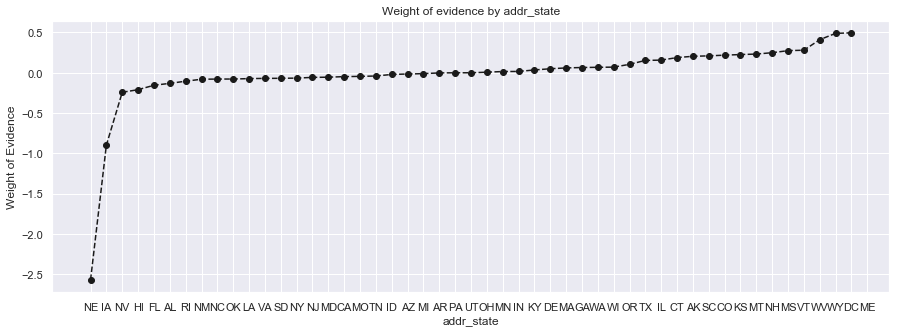

In [106]:
plot_by_woe(df_temp)

In [107]:
#1state is missing(Nevada) .Firstly add that state inorder to avid bias if it turns up later on
if 'addr_state:ND' in df_inputs_prep.columns.values:
    pass
else:
    df_inputs_prep['addr_state:ND'] = 0

In [311]:
#from df_temp, 1st 2 rows have very less observatons which might have caused their extremely low WOE.  Lets combine them 
#together in the worst category (NE,IA)
#
#also , 49th row couldnt calculate woe bcs of having no bad borrowers. lets put it in the best category.(ME)

In [109]:
#plot_by_woe(df_temp.iloc[2:-1 ,:])

In [110]:
#NV, HI and FL have the lowest WOE and different as well. However NV and Hi have very low observations. So lets combine NE, IA 
#and also NV, HI and FL as the first category.
#we can also add alabama to this since the woe is very close and the number of obs is also very less.
#also north dakota which had no observations will be included in this category as well (taking a conservative approach and
#assuming it will fall in the worst category)

In [111]:
df_inputs_prep['addr_state:NE_IA_NV_HI_FL_AL_ND'] = sum([df_inputs_prep['addr_state:NE'],df_inputs_prep['addr_state:IA'],
                                                  df_inputs_prep['addr_state:NV'],df_inputs_prep['addr_state:HI'],
                                                  df_inputs_prep['addr_state:FL'],df_inputs_prep['addr_state:AL'],df_inputs_prep['addr_state:ND']])

In [112]:
#df_temp.iloc[6:-1 ,:]

In [113]:
#plot_by_woe(df_temp.iloc[6:-1 ,:])

In [114]:
#we can form the next group from RI to SD since they all have very small obs and similar woe. NY has a large value of obs and 
#hence is kept separately. Further CA has the highest no of obs. so it needs to be kept separately. lets make NJ and MD a 
#separate group.MO,TN have similar WOE .LEts group them next.lets group ID to IN together since they have close WOI(from graph) 
#dont have significantlylarge number of obs. NEXT, MA to WI have similar WOE. KY ,DE have slightly lesser but can still be 
#included as no of obs is very less. OR,TX,IL stay searately as we canot group them as WOI is significantly different and num
# of obs are also higher.
#On the other end, DC,WY and WV can be grouped together,and then one last category for CT to VT since the number of obs are all
#small

In [115]:
df_inputs_prep['addr_state:RI_NM_NC_OK_LA_VA_SD'] = sum([df_inputs_prep['addr_state:RI'],df_inputs_prep['addr_state:NM'],
                                                         df_inputs_prep['addr_state:NC'],df_inputs_prep['addr_state:OK'],
                                                         df_inputs_prep['addr_state:VA'],df_inputs_prep['addr_state:SD']])

df_inputs_prep['addr_state:NJ_MD'] = sum([df_inputs_prep['addr_state:NJ'],df_inputs_prep['addr_state:MD']])

df_inputs_prep['addr_state:MO_TN'] = sum([df_inputs_prep['addr_state:MO'],df_inputs_prep['addr_state:TN']])

df_inputs_prep['addr_state:ID_AZ_MI_AR_PA_UT_OH_MN_IN'] = sum([df_inputs_prep['addr_state:ID'],df_inputs_prep['addr_state:AZ'],
                                                         df_inputs_prep['addr_state:MI'],df_inputs_prep['addr_state:AR'],
                                                         df_inputs_prep['addr_state:PA'],df_inputs_prep['addr_state:UT'],
                                                         df_inputs_prep['addr_state:OH'],df_inputs_prep['addr_state:MN'],
                                                         df_inputs_prep['addr_state:IN']])

df_inputs_prep['addr_state:KY_DE_MA_GA_WA_WI'] = sum([df_inputs_prep['addr_state:KY'],df_inputs_prep['addr_state:DE'],
                                                         df_inputs_prep['addr_state:MA'],df_inputs_prep['addr_state:GA'],
                                                         df_inputs_prep['addr_state:WA'],df_inputs_prep['addr_state:WI']])

df_inputs_prep['addr_state:DC_WY_WV'] = sum([df_inputs_prep['addr_state:DC'],df_inputs_prep['addr_state:WY'],
                                             df_inputs_prep['addr_state:WV']])

df_inputs_prep['addr_state:CT_AK_SC_CO_KS_MT_NH_MS_VT'] = sum([df_inputs_prep['addr_state:CT'],df_inputs_prep['addr_state:AK'],
                                                         df_inputs_prep['addr_state:SC'],df_inputs_prep['addr_state:CO'],
                                                         df_inputs_prep['addr_state:KS'],df_inputs_prep['addr_state:MT'],
                                                         df_inputs_prep['addr_state:NH'],df_inputs_prep['addr_state:MS'],
                                                         df_inputs_prep['addr_state:VT']])

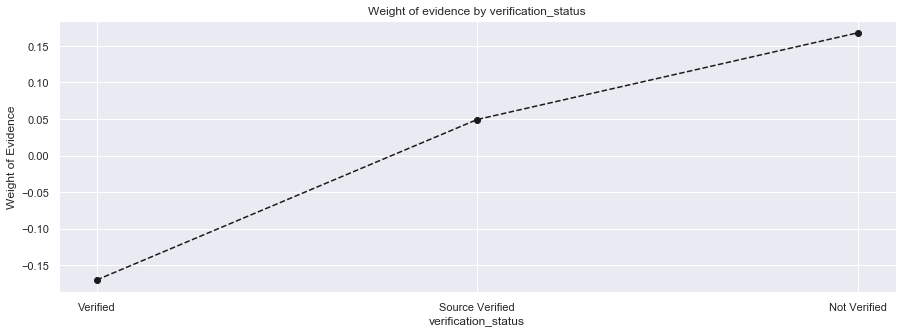

In [116]:
df_temp =  woe(df_inputs_prep,'verification_status',df_targets_prep) 
#plot_by_woe(df_temp)

In [320]:
df_temp

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,Verified,33590,0.870199,29230.0,4360.0,0.352258,0.424207,-0.185858,0.023031
1,Source Verified,30193,0.896930,27081.0,3112.0,0.326360,0.302783,0.074985,0.023031
2,Not Verified,29474,0.904797,26668.0,2806.0,0.321383,0.273010,0.163122,0.023031


In [117]:
#verified has a negative woe than not verified. Doesnt make sense to include this variable.

In [120]:
df_temp =  woe(df_inputs_prep,'purpose',df_targets_prep) 
#plot_by_woe(df_temp.iloc[2:,:],30)
#plot_by_woe_histogram(df_temp.iloc[2:,:],30)

In [121]:
#df_temp

In [122]:
df_inputs_prep['purpose:educational_small_business'] = sum([df_inputs_prep['purpose:educational'],
                                    df_inputs_prep['purpose:small_business']])
df_inputs_prep['purpose:renewable_energy_moving_house_other_medical'] = sum([df_inputs_prep['purpose:renewable_energy'],
                                    df_inputs_prep['purpose:moving'],df_inputs_prep['purpose:house'],
                                    df_inputs_prep['purpose:other'],df_inputs_prep['purpose:medical']])
df_inputs_prep['purpose:vacation_wedding_debt_consolidation'] = sum([df_inputs_prep['purpose:vacation'],
                                    df_inputs_prep['purpose:wedding'],df_inputs_prep['purpose:debt_consolidation']])
df_inputs_prep['purpose:home_improvement_major_purchase_car'] = sum([df_inputs_prep['purpose:home_improvement'],
                                    df_inputs_prep['purpose:major_purchase'],df_inputs_prep['purpose:car']])

In [145]:
df_temp = woe(df_inputs_prep,"initial_list_status",df_targets_prep)
#plot_by_woe(df_temp)
#plot_by_woe_histogram(df_temp)
#df_temp

In [146]:
df_inputs_prep["initial_list_status:f"] = np.where(df_inputs_prep["initial_list_status"] == 'f',1,0)
df_inputs_prep["initial_list_status:w"] = np.where(df_inputs_prep["initial_list_status"] == 'w',1,0)
#df_inputs_prep[["initial_list_status:w","initial_list_status:f"]]

### Preprocessing continuous variables

In [147]:
def woe_continuous(df , variable_name , good_bad_variable_df):
    df = pd.concat([df[variable_name],good_bad_variable_df],axis=1)
    df = pd.concat([df.groupby(variable_name,as_index = False).count() , df.groupby(variable_name,as_index = False).mean()],axis =1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [variable_name,'n_obs','prop_good']
    df['n_good'] = df['prop_good']*df['n_obs']
    df['n_bad'] = (1-df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WOE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WOE'])
    #df = df.reset_index(drop=True)
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WOE']
    df['IV'] = df['IV'].sum()
    return df

In [148]:
df_inputs_prep["term_int"].unique()

array([60, 36], dtype=int64)

In [150]:
df_temp = woe_continuous(df_inputs_prep,"term_int",df_targets_prep)
#df_temp

In [151]:
#plot_by_woe(df_temp)

In [152]:
#creating dummies
df_inputs_prep["term:36"] = np.where(df_inputs_prep["term_int"] == 36,1,0)
df_inputs_prep["term:60"] = np.where(df_inputs_prep["term_int"] == 60,1,0)

In [153]:
df_inputs_prep["emp_length_int"].unique()

array([ 2.,  3.,  6., 10.,  7.,  0.,  8.,  5.,  1.,  9.,  4.])

In [156]:
df_temp = woe_continuous(df_inputs_prep,"emp_length_int",df_targets_prep)
#df_temp

In [158]:
#plot_by_woe(df_temp)
#plot_by_woe_histogram(df_temp)

In [159]:
df_inputs_prep["emp_length:0"] = np.where(df_inputs_prep["emp_length"]==0,1,0)
df_inputs_prep["emp_length:1"] = np.where(df_inputs_prep["emp_length"]==1,1,0)
df_inputs_prep["emp_length:2_3_4"] = np.where(df_inputs_prep["emp_length"].isin(range(2,5)),1,0)
df_inputs_prep["emp_length:5_6"] = np.where(df_inputs_prep["emp_length"].isin([5,6]),1,0)
df_inputs_prep["emp_length:7_8_9"] = np.where(df_inputs_prep["emp_length"].isin(range(7,10)),1,0)
df_inputs_prep["emp_length:10"] = np.where(df_inputs_prep["emp_length"]==10,1,0)

In [161]:
#df_inputs_prep["months_since_issue_date"].unique()

In [162]:
df_inputs_prep["months_since_issue_date_factor"] = pd.cut(df_inputs_prep["months_since_issue_date"],50)
#df_inputs_prep["months_since_issue_date_factor"]

In [164]:
df_temp = woe_continuous(df_inputs_prep,"months_since_issue_date_factor",df_targets_prep)
#plot_by_woe(df_temp,90)
#plot_by_woe_histogram(df_temp,90)

In [165]:
df_inputs_prep["months_since_issue_date:<38"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(38)),1,0)
df_inputs_prep["months_since_issue_date:38_39"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(38,40)),1,0)
df_inputs_prep["months_since_issue_date:40_41"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(40,42)),1,0)
df_inputs_prep["months_since_issue_date:42_48"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(42,49)),1,0)
df_inputs_prep["months_since_issue_date:49_52"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(49,53)),1,0)
df_inputs_prep["months_since_issue_date:53-64"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(53,65)),1,0)
df_inputs_prep["months_since_issue_date:65-84"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(65,85)),1,0)
df_inputs_prep["months_since_issue_date:>84"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(38,int(df_inputs_prep["months_since_issue_date"].max()))),1,0)

In [166]:
#df_inputs_prep["int_rate"].unique()

In [167]:
df_inputs_prep["int_rate_factor"] = pd.cut(df_inputs_prep["int_rate"],50)
df_temp = woe_continuous(df_inputs_prep,"int_rate_factor",df_targets_prep)
#plot_by_woe(df_temp,90)
#plot_by_woe_histogram(df_temp,90)

In [168]:
df_inputs_prep["int_rate:<9.548"] = np.where((df_inputs_prep["int_rate"] <= 9.548),1,0)
df_inputs_prep["int_rate:9.548_12.025"] = np.where((df_inputs_prep["int_rate"] > 9.548) & (df_inputs_prep["int_rate"] <= 12.025) ,1,0)
df_inputs_prep["int_rate:12.025_15.74"] = np.where((df_inputs_prep["int_rate"] > 12.025) & (df_inputs_prep["int_rate"] <= 15.74) ,1,0)
df_inputs_prep["int_rate:15.74_20.281"] = np.where((df_inputs_prep["int_rate"] > 15.74) & (df_inputs_prep["int_rate"] <= 20.281) ,1,0)
df_inputs_prep["int_rate:>20.281"] = np.where((df_inputs_prep["int_rate"] > 20.281) ,1,0)

In [170]:
df_inputs_prep["funded_amnt_factor"] = pd.cut(df_inputs_prep["funded_amnt"],50)
df_temp = woe_continuous(df_inputs_prep,"funded_amnt_factor",df_targets_prep)
#plot_by_woe(df_temp,90)
#plot_by_woe_histogram(df_temp,90)

In [171]:
#there is no clear pattern between the dependent variable and funded_amnt_factor. hence can be dropped out of the model.


In [173]:
#df_inputs_prep["months_since_earliest_cr_line"]

In [174]:
df_inputs_prep["months_since_earliest_cr_line_factor"] = pd.cut(df_inputs_prep["months_since_earliest_cr_line"],50)
#df_inputs_prep["months_since_earliest_cr_line_factor"]

In [177]:
df_temp =woe_continuous(df_inputs_prep,"months_since_earliest_cr_line_factor",df_targets_prep)
#df_temp
#plot_by_woe(df_temp,90)
#plot_by_woe_histogram(df_temp,90)

In [178]:
df_inputs_prep["months_since_earliest_cr_line:<140"] = np.where(df_inputs_prep["months_since_earliest_cr_line"].isin(range(140)),1,0)
df_inputs_prep["months_since_earliest_cr_line:140_176"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(140,177)),1,0)
df_inputs_prep["months_since_earliest_cr_line:177_246"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(177,247)),1,0)
df_inputs_prep["months_since_earliest_cr_line:247_270"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(247,271)),1,0)
df_inputs_prep["months_since_earliest_cr_line:270_352"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(271,352)),1,0)
df_inputs_prep["months_since_earliest_cr_line:>352"] = np.where(df_inputs_prep["months_since_issue_date"].isin(range(352,int(df_inputs_prep["months_since_earliest_cr_line"].max()+1))),1,0)

In [179]:
df_inputs_prep["installment"].nunique()

51241

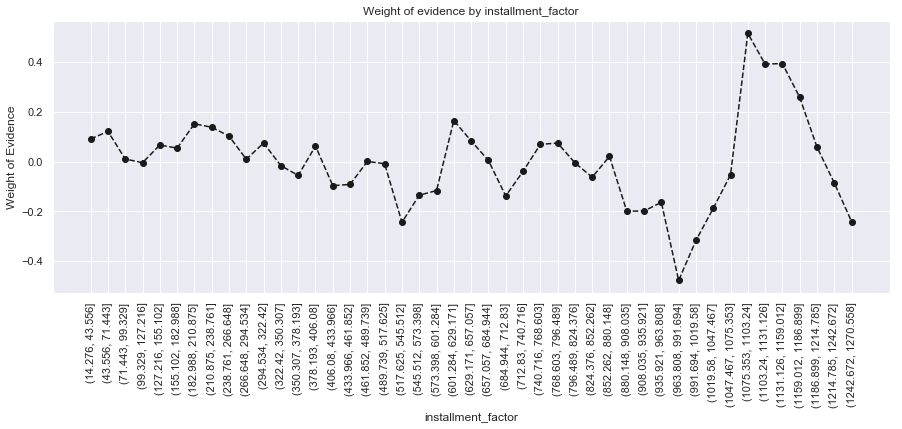

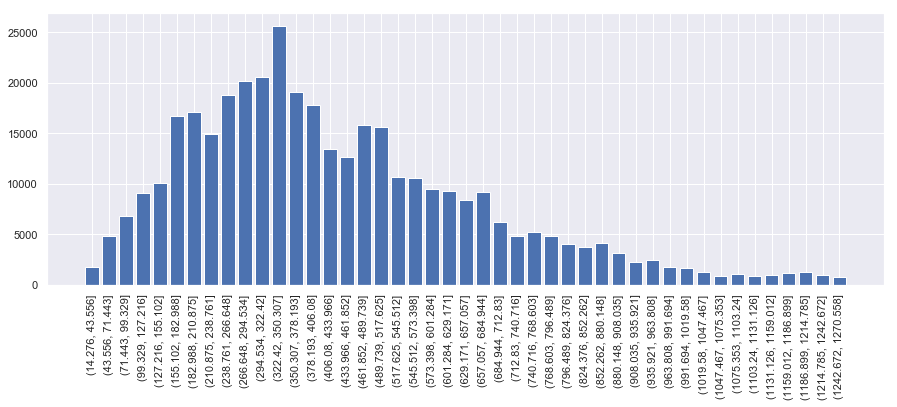

In [184]:
df_inputs_prep["installment_factor"] = pd.cut(df_inputs_prep["installment"],50)
df_temp = woe_continuous(df_inputs_prep,"installment_factor",df_targets_prep)
plot_by_woe(df_temp.iloc[:-5,:],90)
plot_by_woe_histogram(df_temp.iloc[:-5,:],90)

In [182]:
#there is no clear pattern between the dependent variable and installment. hence can be dropped out of the model.


In [183]:
df_inputs_prep["delinq_2yrs"].nunique()

24

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,0.0,76613,0.889966,68183.0,8430.0,0.821690,0.820198,0.001817,inf
1,1.0,11222,0.891998,10010.0,1212.0,0.120633,0.117922,0.022731,inf
2,2.0,3230,0.880186,2843.0,387.0,0.034262,0.037653,-0.094391,inf
3,3.0,1147,0.878814,1008.0,139.0,0.012148,0.013524,-0.107332,inf
4,4.0,487,0.907598,442.0,45.0,0.005327,0.004378,0.196066,inf
5,5.0,256,0.902344,231.0,25.0,0.002784,0.002432,0.134960,inf
6,6.0,120,0.866667,104.0,16.0,0.001253,0.001557,-0.216780,inf
7,7.0,82,0.853659,70.0,12.0,0.000844,0.001168,-0.324993,inf
8,8.0,41,0.829268,34.0,7.0,0.000410,0.000681,-0.508131,inf
9,9.0,13,1.000000,13.0,0.0,0.000157,0.000000,inf,inf


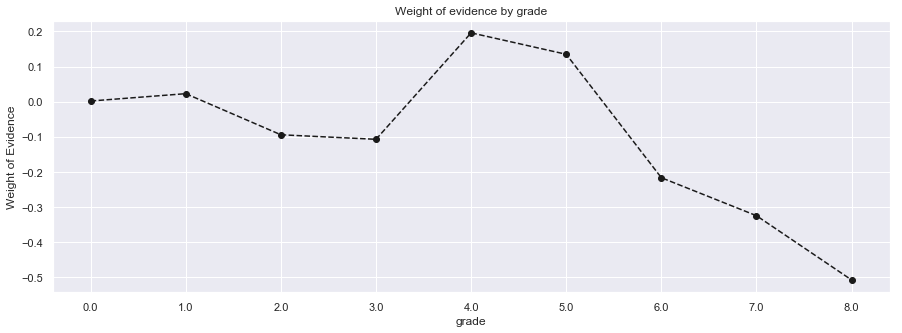

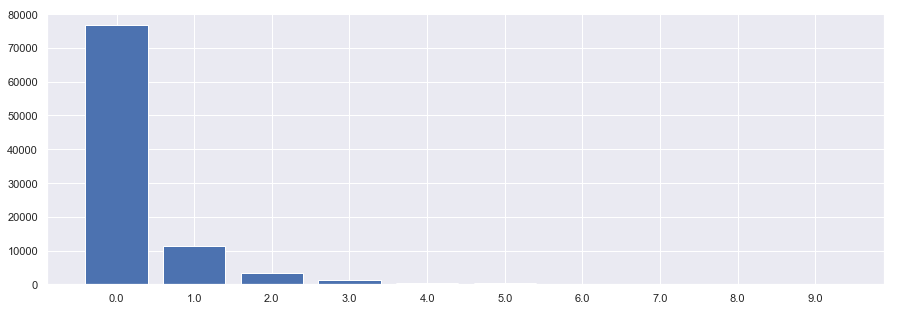

In [351]:
df_temp = woe_continuous(df_inputs_prep,"delinq_2yrs",df_targets_prep)

plot_by_woe(df_temp.iloc[0:10,:])
plot_by_woe_histogram(df_temp.iloc[0:10,:])
df_temp

In [352]:
#no significant trend is observed in delinq_2years in relation to default. hence it is skipped.

In [353]:
df_inputs_prep["inq_last_6mths"].unique()

array([ 1.,  0.,  5.,  4.,  2.,  3., 10.,  6.,  8., 11., 12.,  7., 15.,
        9., 14., 19., 25.])

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,0.0,48471,0.907635,43994.0,4477.0,0.530182,0.435591,0.196518,inf
1,1.0,25975,0.884851,22984.0,2991.0,0.276986,0.291010,-0.049391,inf
2,2.0,11530,0.860624,9923.0,1607.0,0.119584,0.156353,-0.268096,inf
3,3.0,4984,0.836477,4169.0,815.0,0.050242,0.079296,-0.456339,inf
4,4.0,1380,0.850725,1174.0,206.0,0.014148,0.020043,-0.348286,inf
5,5.0,552,0.846014,467.0,85.0,0.005628,0.008270,-0.384904,inf
6,6.0,260,0.773077,201.0,59.0,0.002422,0.005740,-0.862814,inf
7,7.0,46,0.717391,33.0,13.0,0.000398,0.001265,-1.157024,inf
8,8.0,27,0.481481,13.0,14.0,0.000157,0.001362,-2.162690,inf
9,9.0,8,0.625000,5.0,3.0,0.000060,0.000292,-1.577756,inf


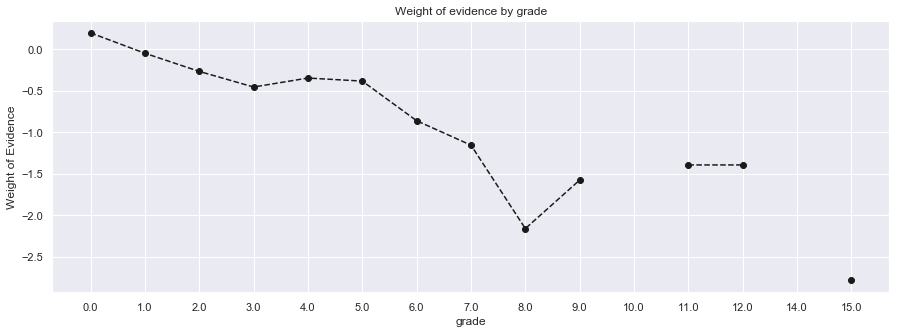

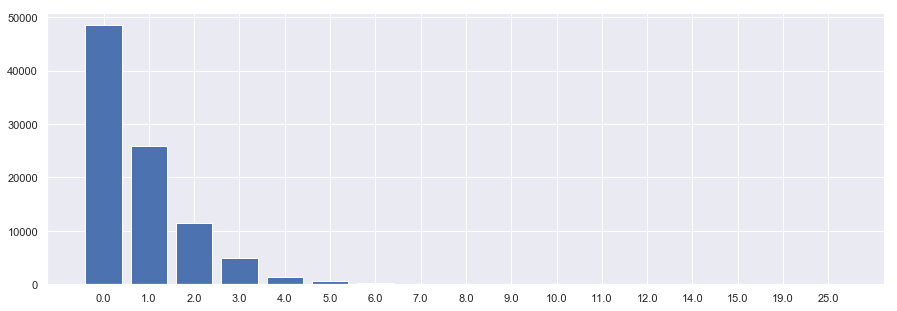

In [354]:
df_temp = woe_continuous(df_inputs_prep,"inq_last_6mths",df_targets_prep)
plot_by_woe(df_temp)
plot_by_woe_histogram(df_temp)
df_temp

In [355]:
df_inputs_prep["inq_last_6mths:0"] = np.where(df_inputs_prep["inq_last_6mths"]==0,1,0)
df_inputs_prep["inq_last_6mths:1"] = np.where(df_inputs_prep["inq_last_6mths"]==1,1,0)
df_inputs_prep["inq_last_6mths:2"] = np.where(df_inputs_prep["inq_last_6mths"]==2,1,0)
df_inputs_prep["inq_last_6mths:3"] = np.where(df_inputs_prep["inq_last_6mths"]==3,1,0)
df_inputs_prep["inq_last_6mths:4"] = np.where(df_inputs_prep["inq_last_6mths"]==4,1,0)
df_inputs_prep["inq_last_6mths:>4"] = np.where(df_inputs_prep["inq_last_6mths"].isin(range(5,int(df_inputs_prep["inq_last_6mths"].max()))),1,0)

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,0.0,7,0.714286,5.0,2.0,0.000060,0.000195,-1.172291,inf
1,1.0,26,0.884615,23.0,3.0,0.000277,0.000292,-0.051700,inf
2,2.0,359,0.821727,295.0,64.0,0.003555,0.006227,-0.560490,inf
3,3.0,1033,0.869313,898.0,135.0,0.010822,0.013135,-0.193687,inf
4,4.0,2562,0.884465,2266.0,296.0,0.027308,0.028799,-0.053170,inf
5,5.0,4288,0.889459,3814.0,474.0,0.045963,0.046118,-0.003355,inf
6,6.0,6222,0.885246,5508.0,714.0,0.066378,0.069469,-0.045508,inf
7,7.0,7492,0.888681,6658.0,834.0,0.080237,0.081144,-0.011241,inf
8,8.0,8474,0.891551,7555.0,919.0,0.091047,0.089414,0.018097,inf
9,9.0,8922,0.884779,7894.0,1028.0,0.095133,0.100019,-0.050094,inf


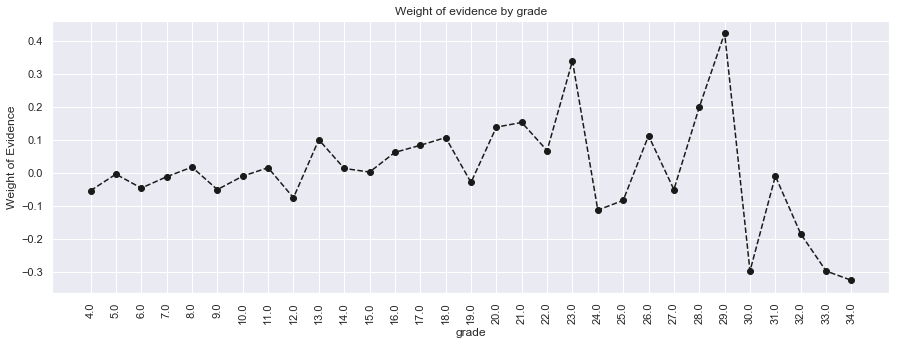

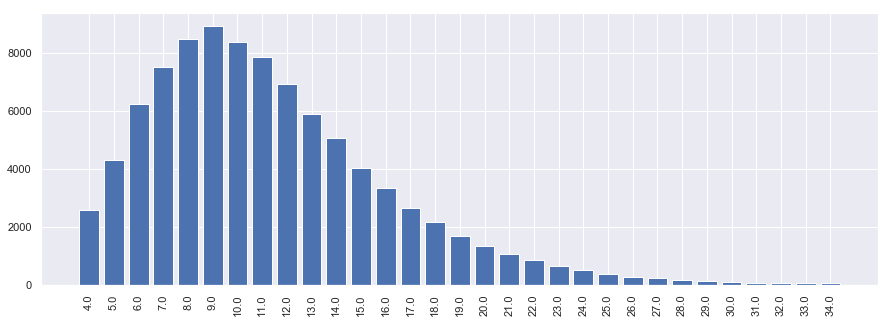

In [356]:
#to be decided later

df_temp = woe_continuous(df_inputs_prep,"open_acc",df_targets_prep)
plot_by_woe(df_temp.iloc[4:35,:],90)
plot_by_woe_histogram(df_temp.iloc[4:35,:],90)
df_temp

In [357]:
df_inputs_prep["pub_rec"].unique()

array([ 1.,  0.,  2.,  6.,  3., 10.,  5.,  7.,  4.,  8., 49.,  9., 13.,
       12., 11.])

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,0.0,80874,0.889260,71918.0,8956.0,0.866701,0.871376,-0.005379,inf
1,1.0,10684,0.891894,9529.0,1155.0,0.114836,0.112376,0.021658,inf
2,2.0,1136,0.897007,1019.0,117.0,0.012280,0.011384,0.075821,inf
3,3.0,326,0.904908,295.0,31.0,0.003555,0.003016,0.164406,inf
4,4.0,112,0.901786,101.0,11.0,0.001217,0.001070,0.128643,inf
5,5.0,58,0.965517,56.0,2.0,0.000675,0.000195,1.243623,inf
6,6.0,27,0.888889,24.0,3.0,0.000289,0.000292,-0.009140,inf
7,7.0,20,0.900000,18.0,2.0,0.000217,0.000195,0.108643,inf
8,8.0,8,1.000000,8.0,0.0,0.000096,0.000000,inf,inf
9,9.0,5,0.800000,4.0,1.0,0.000048,0.000097,-0.702288,inf


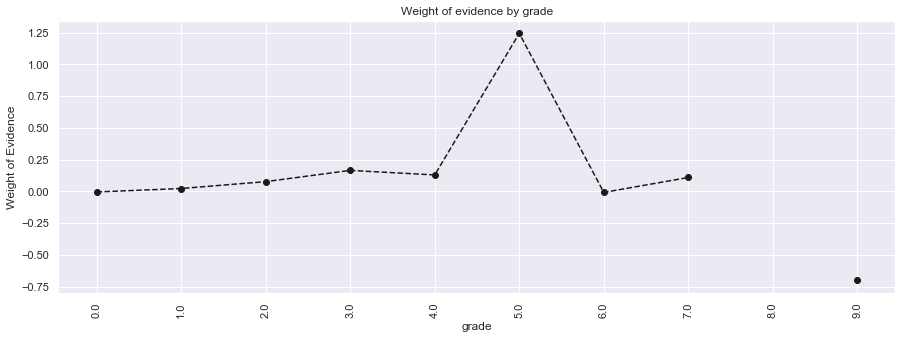

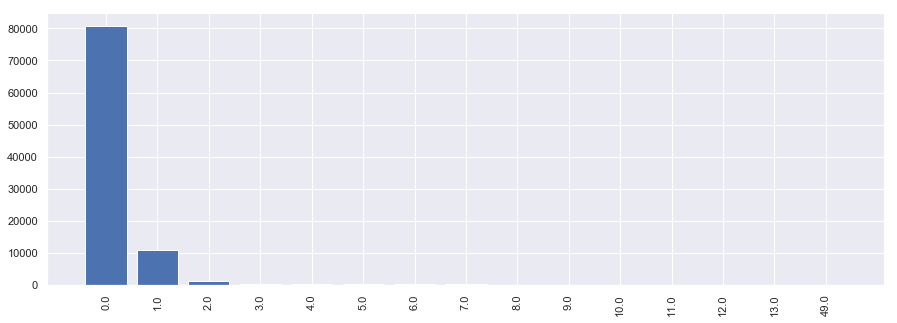

In [358]:
#to be decided later

df_temp = woe_continuous(df_inputs_prep,"pub_rec",df_targets_prep)
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp

In [359]:
df_inputs_prep["total_acc_factors"] = pd.cut(df_inputs_prep["total_acc"],50)

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,"(-0.106, 2.12]",21,0.761905,16.0,5.0,0.000193,0.000486,-0.925431,inf
1,"(2.12, 4.24]",409,0.831296,340.0,69.0,0.004097,0.006713,-0.493743,inf
2,"(4.24, 6.36]",1204,0.853821,1028.0,176.0,0.012389,0.017124,-0.323695,inf
3,"(6.36, 8.48]",2206,0.866274,1911.0,295.0,0.023030,0.028702,-0.220175,inf
4,"(8.48, 10.6]",3368,0.869062,2927.0,441.0,0.035274,0.042907,-0.195893,inf
5,"(10.6, 12.72]",4452,0.881177,3923.0,529.0,0.047277,0.051469,-0.084958,inf
6,"(12.72, 14.84]",5407,0.880895,4763.0,644.0,0.057400,0.062658,-0.087648,inf
7,"(14.84, 16.96]",6234,0.881136,5493.0,741.0,0.066197,0.072096,-0.085353,inf
8,"(16.96, 19.08]",9974,0.884500,8822.0,1152.0,0.106316,0.112084,-0.052833,inf
9,"(19.08, 21.2]",6814,0.890520,6068.0,746.0,0.073127,0.072582,0.007477,inf


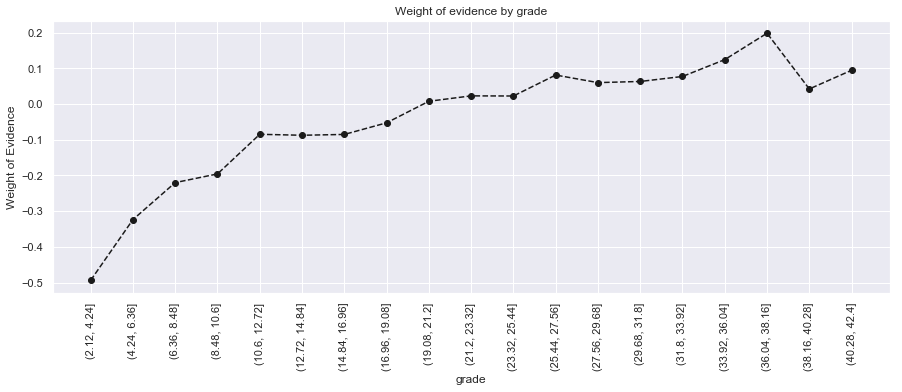

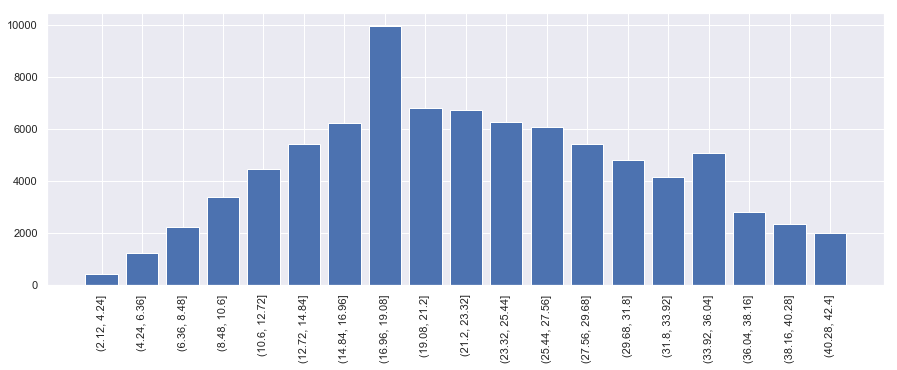

In [360]:
df_temp = woe_continuous(df_inputs_prep,"total_acc_factors",df_targets_prep)
plot_by_woe(df_temp.iloc[1:20,:],90)
plot_by_woe_histogram(df_temp.iloc[1:20,:],90)
df_temp

In [361]:
df_inputs_prep["total_acc_factors:<6"] = np.where(df_inputs_prep["total_acc"] <=6,1,0)
df_inputs_prep["total_acc_factors:6_9"] = np.where((df_inputs_prep["total_acc"] >6) & (df_inputs_prep["total_acc"] <=9),1,0)
df_inputs_prep["total_acc_factors:9_12"] = np.where((df_inputs_prep["total_acc"] >9) & ( df_inputs_prep["total_acc"] <=12),1,0)
df_inputs_prep["total_acc_factors:12_15"] = np.where((df_inputs_prep["total_acc"] >12 ) & ( df_inputs_prep["total_acc"] <=15),1,0)
df_inputs_prep["total_acc_factors:15_21"] = np.where((df_inputs_prep["total_acc"] >15 ) & ( df_inputs_prep["total_acc"] <=21),1,0)
df_inputs_prep["total_acc_factors:21_24"] = np.where((df_inputs_prep["total_acc"] >21 ) & ( df_inputs_prep["total_acc"] <=24),1,0)
df_inputs_prep["total_acc_factors:24_28"] = np.where((df_inputs_prep["total_acc"] >24 ) & ( df_inputs_prep["total_acc"] <=28),1,0)
df_inputs_prep["total_acc_factors:28_34"] = np.where((df_inputs_prep["total_acc"] >28) & ( df_inputs_prep["total_acc"] <=34),1,0)
df_inputs_prep["total_acc_factors:34_40"] = np.where((df_inputs_prep["total_acc"] >34 ) & ( df_inputs_prep["total_acc"] <=40),1,0)
df_inputs_prep["total_acc_factors:>40"] = np.where((df_inputs_prep["total_acc"] >40),1,0)

In [362]:
df_inputs_prep["acc_now_delinq"].unique()

array([0., 1., 2., 4., 3.])

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,0.0,92884,0.889776,82646.0,10238.0,0.995987,0.996108,-0.000122,inf
1,1.0,351,0.894587,314.0,37.0,0.003784,0.003600,0.049893,inf
2,2.0,18,0.833333,15.0,3.0,0.000181,0.000292,-0.479144,inf
3,3.0,2,1.000000,2.0,0.0,0.000024,0.000000,inf,inf
4,4.0,2,1.000000,2.0,0.0,0.000024,0.000000,inf,inf


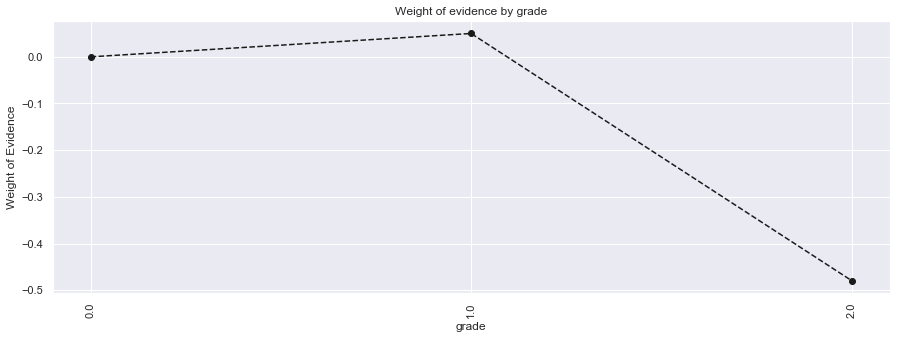

In [363]:
df_temp = woe_continuous(df_inputs_prep,"acc_now_delinq",df_targets_prep)
plot_by_woe(df_temp,90)
df_temp

In [364]:
#too much bias in a single category. 

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,"(-3496.0, 153920.0]",89258,0.887965,79258.0,10000.0,0.955157,0.972952,-0.018459,inf
1,"(153920.0, 303840.0]",3619,0.928433,3360.0,259.0,0.040492,0.025199,0.474286,inf
2,"(303840.0, 453760.0]",250,0.940000,235.0,15.0,0.002832,0.001459,0.662953,inf
3,"(453760.0, 603680.0]",71,0.985915,70.0,1.0,0.000844,0.000097,2.159913,inf
4,"(603680.0, 753600.0]",24,0.958333,23.0,1.0,0.000277,0.000097,1.046912,inf
5,"(753600.0, 903520.0]",13,0.846154,11.0,2.0,0.000133,0.000195,-0.383834,inf
6,"(903520.0, 1053440.0]",6,1.000000,6.0,0.0,0.000072,0.000000,inf,inf
7,"(1053440.0, 1203360.0]",7,1.000000,7.0,0.0,0.000084,0.000000,inf,inf
8,"(1203360.0, 1353280.0]",2,1.000000,2.0,0.0,0.000024,0.000000,inf,inf
9,"(1353280.0, 1503200.0]",1,1.000000,1.0,0.0,0.000012,0.000000,inf,inf


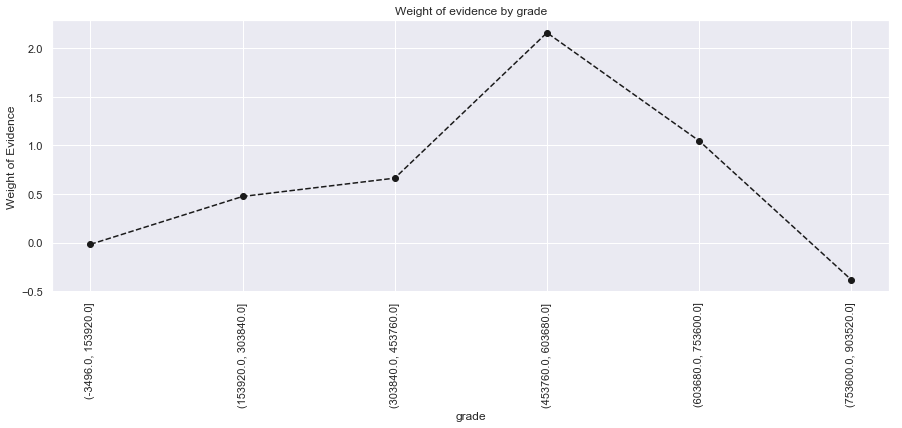

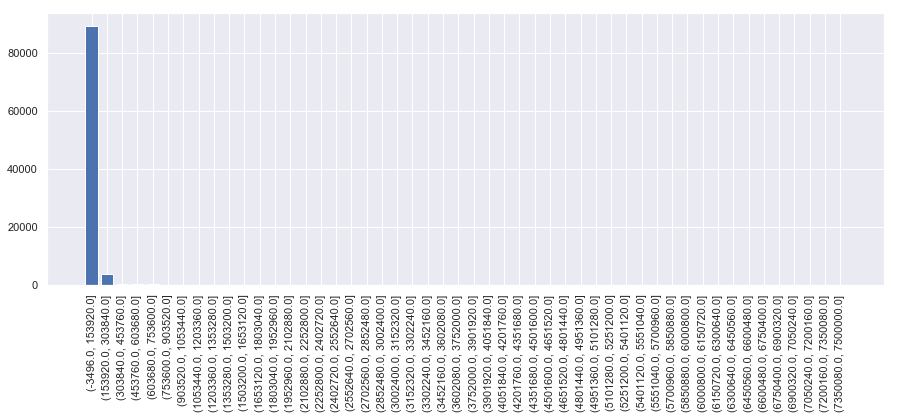

In [365]:
df_inputs_prep["annual_inc_factor"] = pd.cut(df_inputs_prep["annual_inc"], 50)
df_temp = woe_continuous(df_inputs_prep,"annual_inc_factor",df_targets_prep)
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,"(-3496.0, 78960.0]",62447,0.876920,54761.0,7686.0,0.659938,0.747811,-0.125004,inf
1,"(78960.0, 153920.0]",26811,0.913692,24497.0,2314.0,0.295219,0.225141,0.270991,inf
2,"(153920.0, 228880.0]",2905,0.925645,2689.0,216.0,0.032406,0.021016,0.433064,inf
3,"(228880.0, 303840.0]",714,0.939776,671.0,43.0,0.008086,0.004184,0.658987,inf
4,"(303840.0, 378800.0]",164,0.939024,154.0,10.0,0.001856,0.000973,0.645786,inf
5,"(378800.0, 453760.0]",86,0.941860,81.0,5.0,0.000976,0.000486,0.696429,inf
6,"(453760.0, 528720.0]",38,0.973684,37.0,1.0,0.000446,0.000097,1.522336,inf
7,"(528720.0, 603680.0]",33,1.000000,33.0,0.0,0.000398,0.000000,inf,inf
8,"(603680.0, 678640.0]",8,0.875000,7.0,1.0,0.000084,0.000097,-0.142672,inf
9,"(678640.0, 753600.0]",16,1.000000,16.0,0.0,0.000193,0.000000,inf,inf


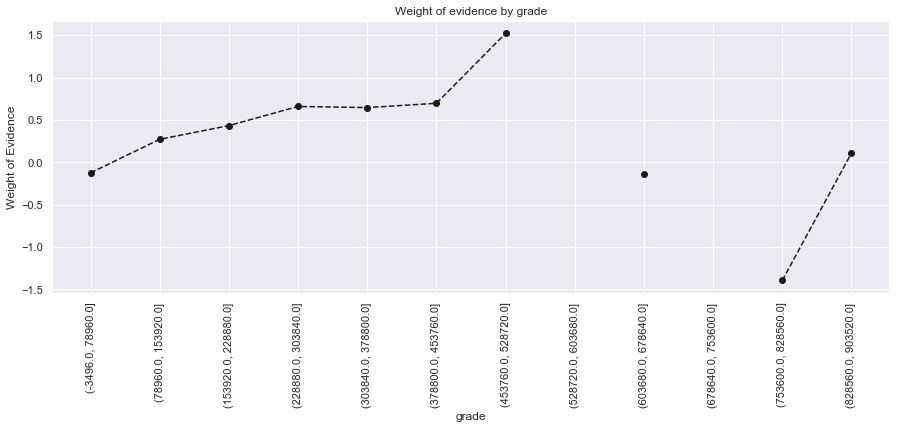

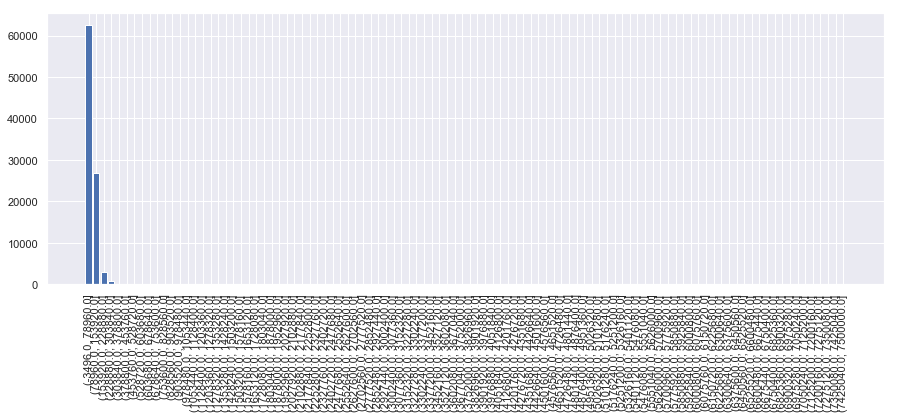

In [366]:
# too many observations in the top category. so lets try and split it into 100 categories
df_inputs_prep["annual_inc_factor"] = pd.cut(df_inputs_prep["annual_inc"], 100)
df_temp = woe_continuous(df_inputs_prep,"annual_inc_factor",df_targets_prep)
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp

In [367]:
#still majorly present in the first 2 ctegories. so lets further process the first two categories separately.
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep["annual_inc"]<=150000,:]

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,"(3854.0, 6920.0]",6,0.833333,5.0,1.0,0.000063,0.000100,-0.460261,0.057003
1,"(6920.0, 9840.0]",46,0.913043,42.0,4.0,0.000531,0.000400,0.281676,0.057003
2,"(9840.0, 12760.0]",163,0.773006,126.0,37.0,0.001592,0.003703,-0.844335,0.057003
3,"(12760.0, 15680.0]",322,0.813665,262.0,60.0,0.003310,0.006005,-0.595699,0.057003
4,"(15680.0, 18600.0]",402,0.808458,325.0,77.0,0.004106,0.007706,-0.629679,0.057003
5,"(18600.0, 21520.0]",754,0.854111,644.0,110.0,0.008135,0.011009,-0.302481,0.057003
6,"(21520.0, 24440.0]",1028,0.849222,873.0,155.0,0.011028,0.015512,-0.341189,0.057003
7,"(24440.0, 27360.0]",1676,0.850239,1425.0,251.0,0.018001,0.025120,-0.333225,0.057003
8,"(27360.0, 30280.0]",2727,0.854419,2330.0,397.0,0.029434,0.039732,-0.300012,0.057003
9,"(30280.0, 33200.0]",1989,0.850679,1692.0,297.0,0.021374,0.029724,-0.329765,0.057003


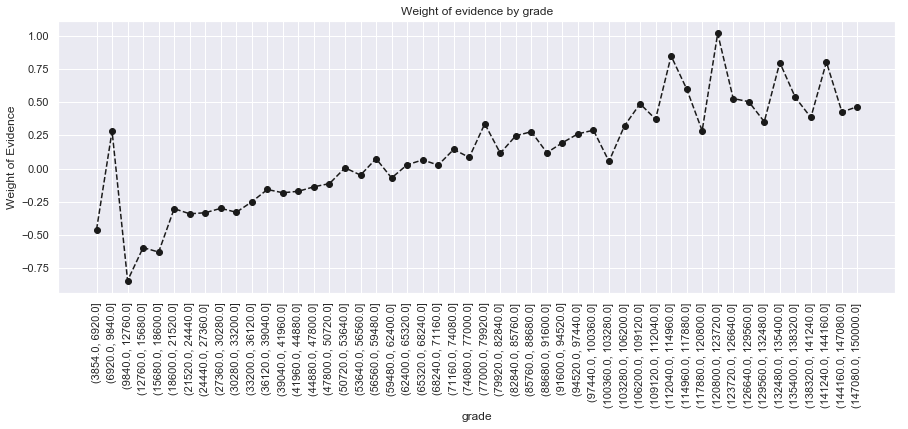

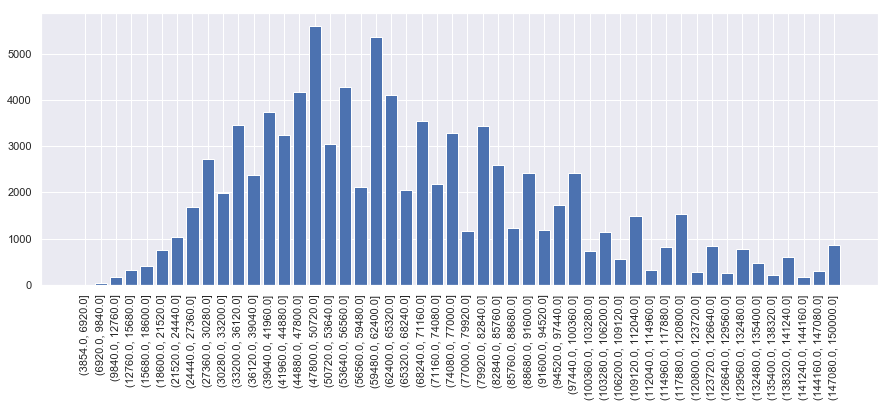

In [368]:
df_inputs_prep_temp["annual_inc_factor"] = pd.cut(df_inputs_prep_temp["annual_inc"],50)
df_temp = woe_continuous(df_inputs_prep_temp,"annual_inc_factor",df_targets_prep[df_inputs_prep_temp.index])
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp

In [369]:
#clearly there is an increasing trend . We can split the data into intervals of 10000 each. However the first and last category 
#will have less numbers. hence we will combine 2/3 of those

In [370]:
df_inputs_prep["annual_inc:<20k"] = np.where(df_inputs_prep["annual_inc"] <= 20000,1,0)
df_inputs_prep["annual_inc:20k-30k"] = np.where((df_inputs_prep["annual_inc"]>20000)&(df_inputs_prep["annual_inc"]<=30000),1,0)
df_inputs_prep["annual_inc:30k-40k"] = np.where((df_inputs_prep["annual_inc"]>30000)&(df_inputs_prep["annual_inc"]<=40000),1,0)
df_inputs_prep["annual_inc:40k-50k"] = np.where((df_inputs_prep["annual_inc"]>40000)&(df_inputs_prep["annual_inc"]<=50000),1,0)
df_inputs_prep["annual_inc:50k-60k"] = np.where((df_inputs_prep["annual_inc"]>50000)&(df_inputs_prep["annual_inc"]<=60000),1,0)
df_inputs_prep["annual_inc:60k-70k"] = np.where((df_inputs_prep["annual_inc"]>60000)&(df_inputs_prep["annual_inc"]<=70000),1,0)
df_inputs_prep["annual_inc:70k-80k"] = np.where((df_inputs_prep["annual_inc"]>70000)&(df_inputs_prep["annual_inc"]<=80000),1,0)
df_inputs_prep["annual_inc:80k-90k"] = np.where((df_inputs_prep["annual_inc"]>80000)&(df_inputs_prep["annual_inc"]<=90000),1,0)
df_inputs_prep["annual_inc:90k-100k"] = np.where((df_inputs_prep["annual_inc"]>90000)&(df_inputs_prep["annual_inc"]<=100000),1,0)
df_inputs_prep["annual_inc:100k-120k"] = np.where((df_inputs_prep["annual_inc"]>100000)&(df_inputs_prep["annual_inc"]<=120000),1,0)
df_inputs_prep["annual_inc:120k-140k"] = np.where((df_inputs_prep["annual_inc"]>120000)&(df_inputs_prep["annual_inc"]<=150000),1,0)
df_inputs_prep["annual_inc:>140k"] = np.where((df_inputs_prep["annual_inc"]>150000),1,0)

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,"(-0.148, 2.96]",933,0.854234,797.0,136.0,0.020717,0.028948,-0.334568,inf
1,"(2.96, 5.92]",1604,0.883416,1417.0,187.0,0.036833,0.039804,-0.077579,inf
2,"(5.92, 8.88]",2434,0.877568,2136.0,298.0,0.055522,0.063431,-0.133171,inf
3,"(8.88, 11.84]",2535,0.896252,2272.0,263.0,0.059057,0.055981,0.053494,inf
4,"(11.84, 14.8]",2488,0.888264,2210.0,278.0,0.057446,0.059174,-0.029641,inf
5,"(14.8, 17.76]",2316,0.889465,2060.0,256.0,0.053547,0.054491,-0.017484,inf
6,"(17.76, 20.72]",2307,0.902037,2081.0,226.0,0.054093,0.048106,0.117301,inf
7,"(20.72, 23.68]",2058,0.885811,1823.0,235.0,0.047386,0.050021,-0.054115,inf
8,"(23.68, 26.64]",2067,0.888244,1836.0,231.0,0.047724,0.049170,-0.029841,inf
9,"(26.64, 29.6]",2002,0.904096,1810.0,192.0,0.047048,0.040868,0.140819,inf


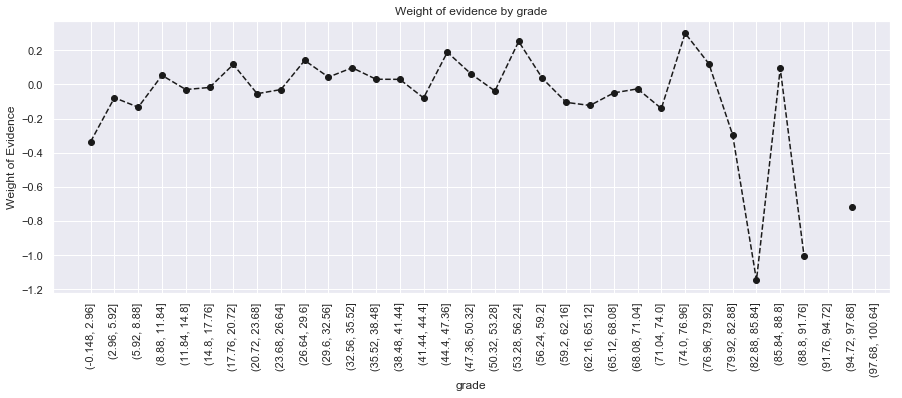

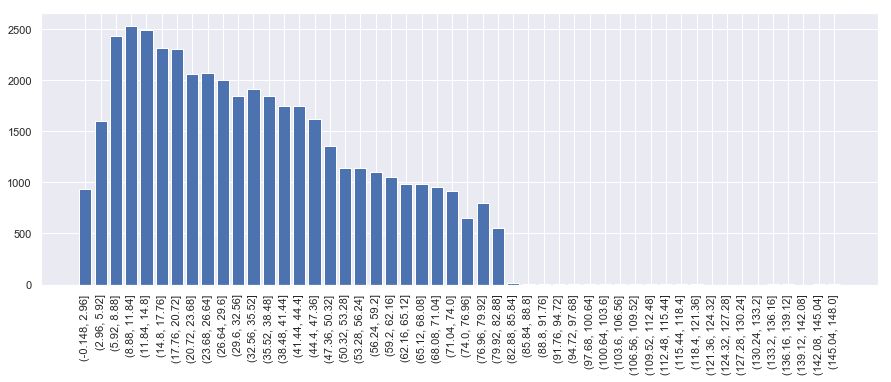

In [371]:
df_inputs_prep_temp = df_inputs_prep[pd.notnull(df_inputs_prep["mths_since_last_delinq"])]
df_inputs_prep_temp["mths_since_last_delinq_factor"] = pd.cut(df_inputs_prep_temp["mths_since_last_delinq"],50)
df_temp = woe_continuous(df_inputs_prep_temp,'mths_since_last_delinq_factor',df_targets_prep[df_inputs_prep_temp.index])
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp

In [372]:
df_inputs_prep["mths_since_last_delinq:Missing"] = np.where(df_inputs_prep["mths_since_last_delinq"].isnull(),1,0)
df_inputs_prep["mths_since_last_delinq:0-3"] = np.where((df_inputs_prep["mths_since_last_delinq"]>=0)& (df_inputs_prep["mths_since_last_delinq"]<=3),1,0)
df_inputs_prep["mths_since_last_delinq:4-30"] = np.where((df_inputs_prep["mths_since_last_delinq"]>=4)& (df_inputs_prep["mths_since_last_delinq"]<=30),1,0)
df_inputs_prep["mths_since_last_delinq:31-56"] = np.where((df_inputs_prep["mths_since_last_delinq"]>=31)& (df_inputs_prep["mths_since_last_delinq"]<=56),1,0)
df_inputs_prep["mths_since_last_delinq:>57"] = np.where((df_inputs_prep["mths_since_last_delinq"]>=57),1,0)

In [373]:
df_inputs_prep["dti"]

421662     8.58
345847    19.45
87245     25.03
422411    17.06
131614    17.11
80593      3.42
1616       8.05
251723    13.01
402125    10.16
298501    12.74
227126     7.32
344489    14.34
67578      9.02
57801     10.29
195967    21.12
28142      1.61
435866    12.40
130083     4.85
422693    18.69
453639    27.26
98774      6.45
115938    20.70
458413     5.17
425981    11.67
220730    10.86
169241    16.32
154533     6.52
36319      7.98
462789    13.05
351560     9.27
          ...  
145915     4.34
430109    21.50
167788    25.32
175797    12.22
30766      4.80
265495     6.74
102725    13.30
396084    21.07
402948    12.76
296861    26.34
407667    24.57
139696    17.46
214263    17.58
223655    12.14
385568     6.66
3219      13.98
229159     5.92
48522     31.59
405815    21.68
370538    16.03
182107    12.83
385918    14.33
163429     5.64
289954    15.50
229660    19.62
36508      9.00
119856    14.74
388862    11.61
167163    19.05
30505     12.93
Name: dti, Length: 93257

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
30,"(23.988, 24.788]",2505,0.867066,2172.0,333.0,0.026175,0.032399,-0.213321,0.028864
31,"(24.788, 25.587]",2132,0.863977,1842.0,290.0,0.022198,0.028216,-0.239856,0.028864
32,"(25.587, 26.387]",1983,0.875946,1737.0,246.0,0.020933,0.023935,-0.133999,0.028864
33,"(26.387, 27.186]",1854,0.873247,1619.0,235.0,0.019511,0.022864,-0.158603,0.028864
34,"(27.186, 27.986]",1664,0.858173,1428.0,236.0,0.017209,0.022962,-0.288384,0.028864
35,"(27.986, 28.786]",1628,0.869165,1415.0,213.0,0.017053,0.020724,-0.194989,0.028864
36,"(28.786, 29.585]",1483,0.870533,1291.0,192.0,0.015558,0.018681,-0.182905,0.028864
37,"(29.585, 30.385]",1214,0.870675,1057.0,157.0,0.012738,0.015275,-0.181638,0.028864
38,"(30.385, 31.184]",962,0.859667,827.0,135.0,0.009966,0.013135,-0.276052,0.028864
39,"(31.184, 31.984]",855,0.858480,734.0,121.0,0.008846,0.011773,-0.285863,0.028864


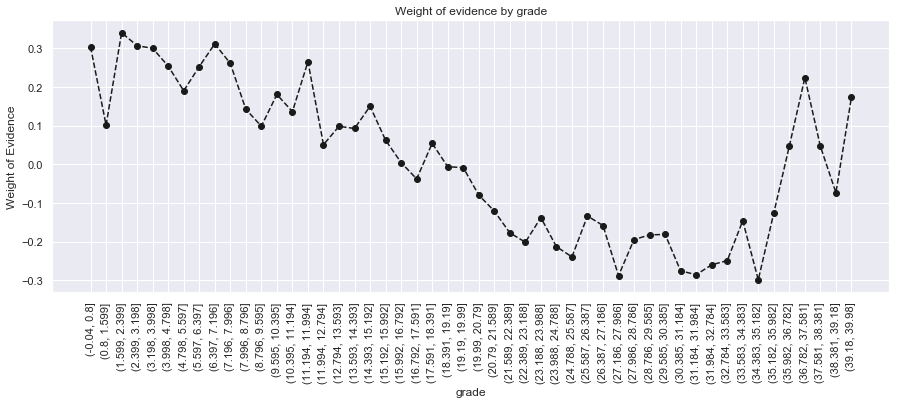

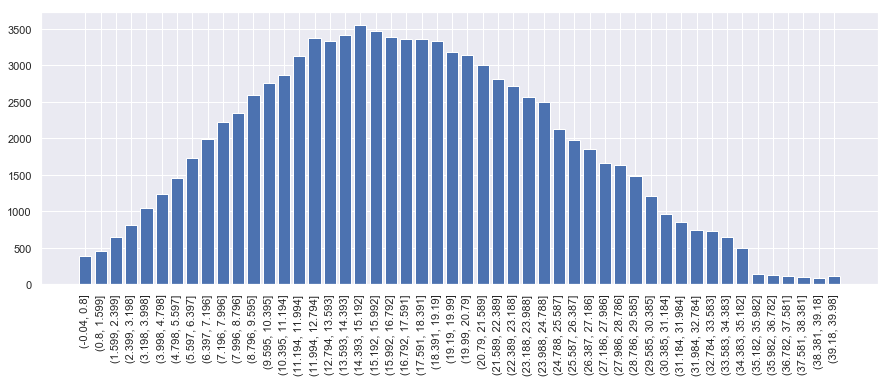

In [374]:
df_inputs_prep["dti_factor"] = pd.cut(df_inputs_prep["dti"],50)
df_temp = woe_continuous(df_inputs_prep,"dti_factor",df_targets_prep)
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp.iloc[-20:,:]

In [375]:
df_inputs_prep["dti:<4"] = np.where(df_inputs_prep["dti"] <=4,1,0)
df_inputs_prep["dti:4_8.8"] = np.where((df_inputs_prep["dti"]>4)&(df_inputs_prep["dti"]<=8.8),1,0)
df_inputs_prep["dti:8.8_10.4"]= np.where((df_inputs_prep["dti"]>8.8)&(df_inputs_prep["dti"]<=10.4),1,0)
df_inputs_prep["dti:10.4_13.6"]= np.where((df_inputs_prep["dti"]>10.4)&(df_inputs_prep["dti"]<=13.6),1,0)
df_inputs_prep["dti:13.6_16.8"]= np.where((df_inputs_prep["dti"]>13.6)&(df_inputs_prep["dti"]<=16.8),1,0)
df_inputs_prep["dti:16.8_19.2"]= np.where((df_inputs_prep["dti"]>16.8)&(df_inputs_prep["dti"]<=19.2),1,0)
df_inputs_prep["dti:19.2_20.8"]= np.where((df_inputs_prep["dti"]>19.2)&(df_inputs_prep["dti"]<=20.8),1,0)
df_inputs_prep["dti:20.8_22.4"]= np.where((df_inputs_prep["dti"]>20.8)&(df_inputs_prep["dti"]<=22.4),1,0)
df_inputs_prep["dti:22.4_24"]= np.where((df_inputs_prep["dti"]>22.4)&(df_inputs_prep["dti"]<=24),1,0)
df_inputs_prep["dti:24_26.4"]= np.where((df_inputs_prep["dti"]>24)&(df_inputs_prep["dti"]<=26.4),1,0)
df_inputs_prep["dti:26.4_29.5"]= np.where((df_inputs_prep["dti"]>26.4)&(df_inputs_prep["dti"]<=29.5),1,0)
df_inputs_prep["dti:29.5_31.2"]= np.where((df_inputs_prep["dti"]>29.5)&(df_inputs_prep["dti"]<=31.2),1,0)
df_inputs_prep["dti:>31.2"]= np.where(df_inputs_prep["dti"]>31.2,1,0)

In [376]:
df_inputs_prep["mths_since_last_record"].nunique()

120

,grade,n_obs,prop_good,n_good,n_bad,prop_n_good,prop_n_bad,WOE,IV
0,"(-0.119, 11.9]",417,0.808153,337.0,80.0,0.029950,0.057678,-0.655346,0.082175
1,"(11.9, 23.8]",395,0.931646,368.0,27.0,0.032705,0.019466,0.518843,0.082175
2,"(23.8, 35.7]",604,0.889073,537.0,67.0,0.047725,0.048306,-0.012097,0.082175
3,"(35.7, 47.6]",1128,0.925532,1044.0,84.0,0.092784,0.060562,0.426595,0.082175
4,"(47.6, 59.5]",1568,0.916454,1437.0,131.0,0.127711,0.094448,0.301713,0.082175
5,"(59.5, 71.4]",1624,0.908251,1475.0,149.0,0.131088,0.107426,0.199064,0.082175
6,"(71.4, 83.3]",1412,0.895184,1264.0,148.0,0.112336,0.106705,0.051422,0.082175
7,"(83.3, 95.2]",1362,0.837004,1140.0,222.0,0.101315,0.160058,-0.457297,0.082175
8,"(95.2, 107.1]",2062,0.881668,1818.0,244.0,0.161571,0.175919,-0.085079,0.082175
9,"(107.1, 119.0]",2067,0.886309,1832.0,235.0,0.162815,0.169430,-0.039825,0.082175


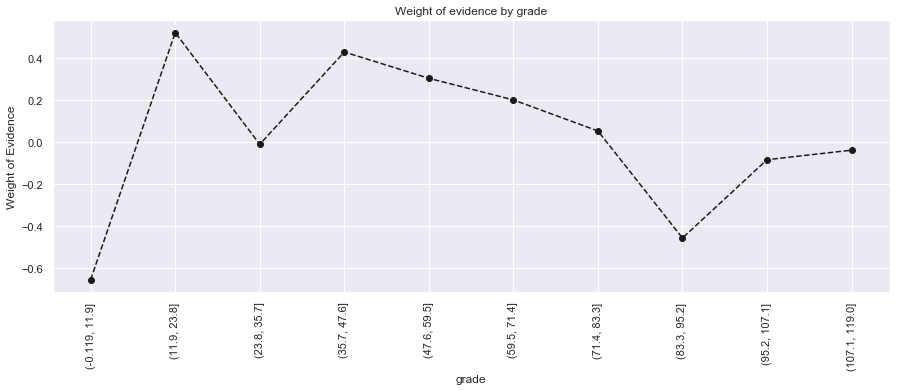

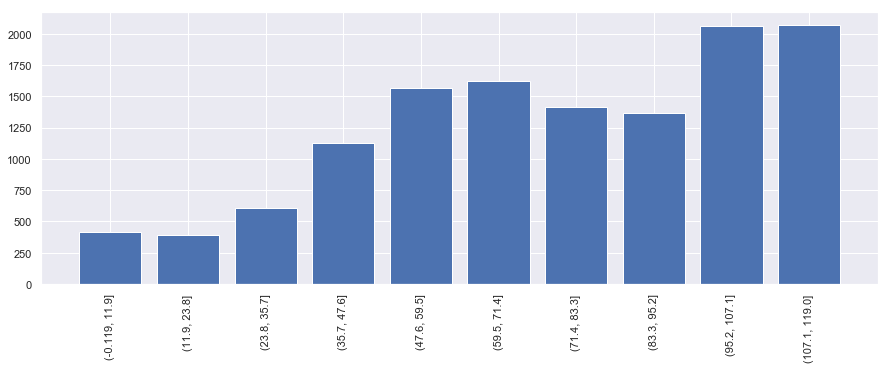

In [377]:
df_inputs_prep["mths_since_last_record:factor"]= pd.cut(df_inputs_prep["mths_since_last_record"],10)
df_temp = woe_continuous(df_inputs_prep,"mths_since_last_record:factor",df_targets_prep)
plot_by_woe(df_temp,90)
plot_by_woe_histogram(df_temp,90)
df_temp

In [378]:
df_inputs_prep['mths_since_last_record:Missing'] = np.where((df_inputs_prep['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prep["mths_since_last_record:<13"] = np.where(df_inputs_prep["mths_since_last_record"]<=13,1,0)
df_inputs_prep["mths_since_last_record:13_26"] = np.where((df_inputs_prep["mths_since_last_record"]>13)&(df_inputs_prep["mths_since_last_record"]<=26),1,0)
df_inputs_prep["mths_since_last_record:26_52"] = np.where((df_inputs_prep["mths_since_last_record"]>26)&(df_inputs_prep["mths_since_last_record"]<=52),1,0)
df_inputs_prep["mths_since_last_record:52_77"] = np.where((df_inputs_prep["mths_since_last_record"]>52)&(df_inputs_prep["mths_since_last_record"]<=77),1,0)
df_inputs_prep["mths_since_last_record:77_103"] = np.where((df_inputs_prep["mths_since_last_record"]>77)&(df_inputs_prep["mths_since_last_record"]<=103),1,0)
df_inputs_prep["mths_since_last_record:>103"] = np.where(df_inputs_prep["mths_since_last_record"]>103,1,0)

In [379]:
#thats the end of preprocessing. Now to create a similar set of dummies for the test, we will go back and run all the code by 
#changing df_inputs_prep to test data set instead of train.


In [380]:
#loan_data_inputs_train = df_inputs_prep
loan_data_inputs_test = df_inputs_prep

In [382]:
loan_data_inputs_train.to_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\X_train.csv")
loan_data_inputs_test.to_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\X_test.csv")
y_train.to_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\y_train.csv")
y_test.to_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\y_test.csv")

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


In [383]:
#X_train = pd.read_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\X_train.csv" ,index_col = 0)
#X_test = pd.read_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\X_test.csv", index_col = 0)
#y_train = pd.read_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\y_train.csv",index_col = 0,header = None)
#y_test = pd.read_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\y_test.csv",index_col = 0,header = None)


In [384]:
X_train_selected_variables = loan_data_inputs_train.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:NE_IA_NV_HI_FL_ND',
'addr_state:RI_NM_NC_OK_LA_VA_SD',
'addr_state:NY',
'addr_state:NJ_MD',
'addr_state:CA',
'addr_state:MO_TN',
'addr_state:ID_AZ_MI_AR_PA_UT_OH_MN_IN',
'addr_state:KY_DE_MA_GA_WA_WI',
'addr_state:OR',
'addr_state:TX',
'addr_state:IL',
'addr_state:DC_WY_WV',
'addr_state:CT_AK_SC_CO_KS_MT_NH_MS_VT',
'purpose:educational_small_business',
'purpose:renewable_energy_moving_house_other_medical',
'purpose:vacation_wedding_debt_consolidation',
'purpose:home_improvement_major_purchase_car',
'purpose:credit_card',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2_3_4',
'emp_length:5_6',
'emp_length:7_8_9',
'emp_length:10',
'months_since_issue_date:<38',
'months_since_issue_date:38_39',
'months_since_issue_date:40_41',
'months_since_issue_date:42_48',
'months_since_issue_date:49_52',
'months_since_issue_date:53-64',
'months_since_issue_date:65-84',
'months_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548_12.025',
'int_rate:12.025_15.74',
'int_rate:15.74_20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:140_176',
'months_since_earliest_cr_line:177_246',
'months_since_earliest_cr_line:247_270',
'months_since_earliest_cr_line:270_352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1',
'inq_last_6mths:2',
'inq_last_6mths:3',
'inq_last_6mths:4',
'inq_last_6mths:>4',
'total_acc_factors:<6',
'total_acc_factors:6_9',
'total_acc_factors:9_12',
'total_acc_factors:12_15',
'total_acc_factors:15_21',
'total_acc_factors:21_24',
'total_acc_factors:24_28',
'total_acc_factors:28_34',
'total_acc_factors:34_40',
'total_acc_factors:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>57',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'dti:<4',
'dti:4_8.8',
'dti:8.8_10.4',
'dti:10.4_13.6',
'dti:13.6_16.8',
'dti:16.8_19.2',
'dti:19.2_20.8',
'dti:20.8_22.4',
'dti:22.4_24',
'dti:24_26.4',
'dti:26.4_29.5',
'dti:29.5_31.2',
'dti:>31.2',
'mths_since_last_record:<13',
'mths_since_last_record:13_26',
'mths_since_last_record:26_52',
'mths_since_last_record:52_77',
'mths_since_last_record:77_103',
'mths_since_last_record:>103']]

C:\Users\DEEPAK\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [385]:
#now drop the reference variable from each set of dummies to avoid the dummy variable trap

In [386]:
ref_categories = ['grade:G',
'home_ownership:Rent_Other_None_Any',
'addr_state:NE_IA_NV_HI_FL_ND',
'purpose:educational_small_business',
'emp_length:0',
'term:60',
'months_since_issue_date:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>4',
'total_acc_factors:<6',
'annual_inc:<20k',
'mths_since_last_delinq:0-3',
'dti:>31.2',
'mths_since_last_record:<13']

In [389]:
X_train_mod = X_train_selected_variables.drop(ref_categories,axis =1)
X_train_mod.shape

(373028, 92)

### PD MODEL

In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [408]:
LR = LogisticRegression()
LR.fit(X_train_mod,y_train)

C:\Users\DEEPAK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [392]:
LR.intercept_

array([-1.01763289])

In [393]:
LR.coef_

array([[ 1.13639036,  0.9031227 ,  0.69536598,  0.51974634,  0.35860196,
         0.21528307,  0.13462285,  0.0964554 ,  0.06004062,  0.06823575,
         0.04382989,  0.07184096,  0.08076754,  0.14338303,  0.18218255,
         0.24178028,  0.24493688,  0.28314975,  0.57883276,  0.34202792,
         0.48663144,  0.47469188,  0.54620309,  0.58077769,  0.08461882,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.09500152,  0.89752725,  0.80154544,  0.58050631,  0.41120056,
         0.17523435, -0.0851037 ,  0.9699096 ,  0.60342295,  0.34565619,
         0.14287591,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.56927162,  0.44627009,  0.34848314,  0.24677635,
         0.19669479, -0.03952728, -0.06893814, -0.08861552, -0.12694325,
        -0.13775869, -0.13086772, -0.1394128 , -0.13984928, -0.17162449,
         0.09225275,  0.14428008,  0.17007362,  0.14964319, -0.03468906,
         0.0365721 ,  0.15589274,  0.21557587,  0.3

In [396]:
feature_name = X_train_mod.columns.values

In [400]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table["Coefficients"] = np.transpose(LR.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0] = ["Intercept" , LR.intercept_[0]]
summary_table.sort_index()

,Feature Name,Coefficients
0,Intercept,-1.017633
1,grade:A,1.136390
2,grade:B,0.903123
3,grade:C,0.695366
4,grade:D,0.519746
5,grade:E,0.358602
6,grade:F,0.215283
7,home_ownership:MORTGAGE,0.134623
8,home_ownership:OWN,0.096455
9,addr_state:RI_NM_NC_OK_LA_VA_SD,0.060041


In [ ]:
#, intercept

### logistic regression model with p values

In [404]:
import scipy.stats as stat
from sklearn import linear_model

In [414]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [415]:
LR = LogisticRegression_with_p_values()

In [416]:
LR.fit(X_train_mod,y_train)

C:\Users\DEEPAK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LinAlgError: Singular matrix

###### was throwing a singular matrix error. so did this to see if there are any corelated varibles. figured out 
#months_since_earliest_cr_line and emp_length vars have all zeroes. some preprocessing error. Fix it later . for now drop them

In [419]:
X_train_mod.corr().to_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\correlat.csv")

In [423]:
X_train_mod["months_since_earliest_cr_line:140_176"].unique()

array([0], dtype=int64)

In [424]:
X_train_mod.drop(['emp_length:1',
'emp_length:2_3_4',
'emp_length:5_6',
'emp_length:7_8_9',
'emp_length:10',
'months_since_earliest_cr_line:140_176',
'months_since_earliest_cr_line:177_246',
'months_since_earliest_cr_line:247_270',
'months_since_earliest_cr_line:270_352',
'months_since_earliest_cr_line:>352'
], axis =1, inplace=True)

In [425]:
LR = LogisticRegression_with_p_values()
LR.fit(X_train_mod,y_train)

C:\Users\DEEPAK\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [428]:
feature_name = X_train_mod.columns.values

In [440]:
summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)
summary_table["Coefficients"] = np.transpose(LR.coef_)
summary_table.index = summary_table.index+1
summary_table.loc[0] = ["Intercept" , LR.intercept_[0]]
summary_table = summary_table.sort_index()

In [441]:
p_values = LR.p_values

In [442]:
p_values = np.append(np.nan,np.array(p_values))

In [443]:
summary_table["p_values"] = p_values

In [444]:
summary_table

,Feature Name,Coefficients,p_values
0,Intercept,-1.017610,NaN
1,grade:A,1.136377,5.467992e-36
2,grade:B,0.903114,4.408399e-52
3,grade:C,0.695357,4.394824e-37
4,grade:D,0.519738,4.528994e-24
5,grade:E,0.358595,8.733820e-16
6,grade:F,0.215277,3.534261e-06
7,home_ownership:MORTGAGE,0.134623,8.860169e-27
8,home_ownership:OWN,0.096455,1.284407e-06
9,addr_state:RI_NM_NC_OK_LA_VA_SD,0.060041,1.247588e-02


In [445]:
summary_table.to_csv(r"C:\Users\DEEPAK\Desktop\Credit Risk Modelling\ipynb files\pValues.csv")

In [446]:
#after inspecting the p values, none of the independent variables have p values less than 0.05 for all the dummies. Hence we 
#retain all of them

### Out of sample Validation

In [447]:
X_test_selected_variables = loan_data_inputs_test.loc[:,['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:Rent_Other_None_Any',
'home_ownership:MORTGAGE',
'home_ownership:OWN',
'addr_state:NE_IA_NV_HI_FL_ND',
'addr_state:RI_NM_NC_OK_LA_VA_SD',
'addr_state:NY',
'addr_state:NJ_MD',
'addr_state:CA',
'addr_state:MO_TN',
'addr_state:ID_AZ_MI_AR_PA_UT_OH_MN_IN',
'addr_state:KY_DE_MA_GA_WA_WI',
'addr_state:OR',
'addr_state:TX',
'addr_state:IL',
'addr_state:DC_WY_WV',
'addr_state:CT_AK_SC_CO_KS_MT_NH_MS_VT',
'purpose:educational_small_business',
'purpose:renewable_energy_moving_house_other_medical',
'purpose:vacation_wedding_debt_consolidation',
'purpose:home_improvement_major_purchase_car',
'purpose:credit_card',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2_3_4',
'emp_length:5_6',
'emp_length:7_8_9',
'emp_length:10',
'months_since_issue_date:<38',
'months_since_issue_date:38_39',
'months_since_issue_date:40_41',
'months_since_issue_date:42_48',
'months_since_issue_date:49_52',
'months_since_issue_date:53-64',
'months_since_issue_date:65-84',
'months_since_issue_date:>84',
'int_rate:<9.548',
'int_rate:9.548_12.025',
'int_rate:12.025_15.74',
'int_rate:15.74_20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'months_since_earliest_cr_line:140_176',
'months_since_earliest_cr_line:177_246',
'months_since_earliest_cr_line:247_270',
'months_since_earliest_cr_line:270_352',
'months_since_earliest_cr_line:>352',
'inq_last_6mths:0',
'inq_last_6mths:1',
'inq_last_6mths:2',
'inq_last_6mths:3',
'inq_last_6mths:4',
'inq_last_6mths:>4',
'total_acc_factors:<6',
'total_acc_factors:6_9',
'total_acc_factors:9_12',
'total_acc_factors:12_15',
'total_acc_factors:15_21',
'total_acc_factors:21_24',
'total_acc_factors:24_28',
'total_acc_factors:28_34',
'total_acc_factors:34_40',
'total_acc_factors:>40',
'mths_since_last_delinq:Missing',
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-30',
'mths_since_last_delinq:31-56',
'mths_since_last_delinq:>57',
'annual_inc:<20k',
'annual_inc:20k-30k',
'annual_inc:30k-40k',
'annual_inc:40k-50k',
'annual_inc:50k-60k',
'annual_inc:60k-70k',
'annual_inc:70k-80k',
'annual_inc:80k-90k',
'annual_inc:90k-100k',
'annual_inc:100k-120k',
'annual_inc:120k-140k',
'annual_inc:>140k',
'dti:<4',
'dti:4_8.8',
'dti:8.8_10.4',
'dti:10.4_13.6',
'dti:13.6_16.8',
'dti:16.8_19.2',
'dti:19.2_20.8',
'dti:20.8_22.4',
'dti:22.4_24',
'dti:24_26.4',
'dti:26.4_29.5',
'dti:29.5_31.2',
'dti:>31.2',
'mths_since_last_record:<13',
'mths_since_last_record:13_26',
'mths_since_last_record:26_52',
'mths_since_last_record:52_77',
'mths_since_last_record:77_103',
'mths_since_last_record:>103']]

C:\Users\DEEPAK\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [448]:
ref_categories = ['grade:G',
'home_ownership:Rent_Other_None_Any',
'addr_state:NE_IA_NV_HI_FL_ND',
'purpose:educational_small_business',
'emp_length:0',
'term:60',
'months_since_issue_date:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<140',
'inq_last_6mths:>4',
'total_acc_factors:<6',
'annual_inc:<20k',
'mths_since_last_delinq:0-3',
'dti:>31.2',
'mths_since_last_record:<13']

In [449]:
X_test = X_test_selected_variables.drop(ref_categories,axis=1)

In [450]:
X_test.drop(['emp_length:1',
'emp_length:2_3_4',
'emp_length:5_6',
'emp_length:7_8_9',
'emp_length:10',
'months_since_earliest_cr_line:140_176',
'months_since_earliest_cr_line:177_246',
'months_since_earliest_cr_line:247_270',
'months_since_earliest_cr_line:270_352',
'months_since_earliest_cr_line:>352'], axis=1,inplace= True)

In [460]:
y_pred = LR.model.predict(X_test)
y_pred_proba = LR.model.predict_proba(X_test)
y_pred_proba[:][:,1] #probability of non default(1-PD)

array([0.94932382, 0.87651389, 0.74115326, ..., 0.96709245, 0.86801665,
       0.88027798])

In [463]:
y_test_temp = y_test
y_test_temp.reset_index(drop = True, inplace = True)

In [467]:
df_actual_predicted_prob = pd.concat([y_test_temp,pd.DataFrame(y_pred_proba[:][:,1])],axis =1)
df_actual_predicted_prob.columns = ["Actual Targets","Predicted Probability"]
df_actual_predicted_prob

,Actual Targets,Predicted Probability
0,1,0.949324
1,1,0.876514
2,1,0.741153
3,1,0.938342
4,1,0.623917
5,1,0.934137
6,0,0.906498
7,1,0.932465
8,1,0.869722
9,1,0.947440


### Accuracy and the area under the curve

In [475]:
tr = 0.5

In [476]:
df_actual_predicted_prob["Prediction"] = np.where(df_actual_predicted_prob["Predicted Probability"] > tr,1,0)
pd.crosstab(df_actual_predicted_prob["Actual Targets"] , df_actual_predicted_prob["Prediction"],rownames=["Actual"],colnames=["Predicted"])

Predicted,0,1
Actual,,
0,16,10262
1,15,82964


In [480]:
confMatrixAccuracy = pd.crosstab(df_actual_predicted_prob["Actual Targets"] ,
            df_actual_predicted_prob["Prediction"],rownames=["Actual"],colnames=["Predicted"])/df_actual_predicted_prob.shape[0]

In [481]:
Accuracy = confMatrixAccuracy.iloc[0,0] + confMatrixAccuracy.iloc[1,1]
Accuracy

0.8897991571678265

In [482]:
from sklearn.metrics import roc_curve,roc_auc_score

In [484]:
roc_curve(df_actual_predicted_prob["Actual Targets"],df_actual_predicted_prob["Predicted Probability"])

(array([0.        , 0.        , 0.        , ..., 0.99980541, 0.99980541,
        1.        ]),
 array([0.00000000e+00, 1.20512419e-05, 9.64099350e-05, ...,
        9.99975898e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.99149692, 0.99149692, 0.99115277, ..., 0.45028451, 0.41909726,
        0.32496887]))

In [485]:
#False positive rates, True positives rate, Thresholds

fpr,tpr,threshold = roc_curve(df_actual_predicted_prob["Actual Targets"],df_actual_predicted_prob["Predicted Probability"])

Text(0.5, 1.0, 'ROC Curve')

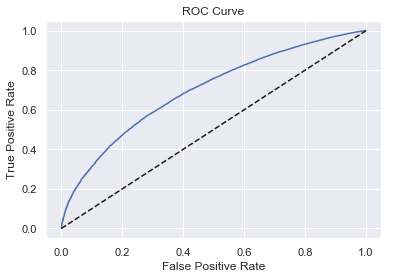

In [486]:
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = "--" , color = 'k')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [487]:
AUC = roc_auc_score(df_actual_predicted_prob["Actual Targets"], df_actual_predicted_prob["Predicted Probability"])
AUC

0.6976691072577201

### Gini and Kolmogorov-Smirnov

In [489]:
df_actual_predicted_prob = df_actual_predicted_prob.sort_values("Predicted Probability")
df_actual_predicted_prob = df_actual_predicted_prob.reset_index()
df_actual_predicted_prob

,index,Actual Targets,Predicted Probability,Prediction
0,18699,0,0.324969,0
1,52900,0,0.406811,0
2,60445,1,0.419097,0
3,78157,1,0.448134,0
4,12729,0,0.450285,0
5,38540,1,0.453134,0
6,35443,0,0.458947,0
7,15118,0,0.461441,0
8,43081,1,0.463132,0
9,48392,0,0.464249,0


In [491]:
df_actual_predicted_prob["Cumulative N Population"] = df_actual_predicted_prob.index +1 
df_actual_predicted_prob["Cumulative N good"] = df_actual_predicted_prob["Actual Targets"].cumsum()
df_actual_predicted_prob["Cumulative N bad"] = df_actual_predicted_prob["Cumulative N Population"]-df_actual_predicted_prob["Actual Targets"].cumsum()

In [493]:
df_actual_predicted_prob["Cumulative Perc Population"] = df_actual_predicted_prob["Cumulative N Population"]/(df_actual_predicted_prob.shape[0])
df_actual_predicted_prob["Cumulative Perc Good"] = df_actual_predicted_prob["Cumulative N good"]/(df_actual_predicted_prob["Actual Targets"].sum())
df_actual_predicted_prob["Cumulative Perc Bad"] = df_actual_predicted_prob["Cumulative N bad"]/(df_actual_predicted_prob.shape[0] - df_actual_predicted_prob["Actual Targets"].sum())
#df_actual_predicted_prob

,index,Actual Targets,Predicted Probability,Prediction,Cumulative N Population,Cumulative N good,Cumulative N bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,18699,0,0.324969,0,1,0,1,0.000011,0.000000,0.000097
1,52900,0,0.406811,0,2,0,2,0.000021,0.000000,0.000195
2,60445,1,0.419097,0,3,1,2,0.000032,0.000012,0.000195
3,78157,1,0.448134,0,4,2,2,0.000043,0.000024,0.000195
4,12729,0,0.450285,0,5,2,3,0.000054,0.000024,0.000292
5,38540,1,0.453134,0,6,3,3,0.000064,0.000036,0.000292
6,35443,0,0.458947,0,7,3,4,0.000075,0.000036,0.000389
7,15118,0,0.461441,0,8,3,5,0.000086,0.000036,0.000486
8,43081,1,0.463132,0,9,4,5,0.000097,0.000048,0.000486
9,48392,0,0.464249,0,10,4,6,0.000107,0.000048,0.000584


Text(0.5, 1.0, 'Gini')

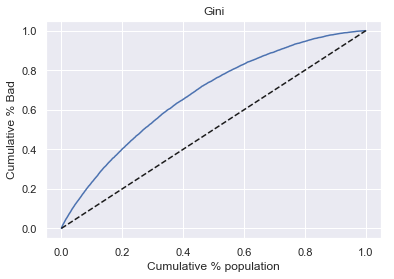

In [494]:
plt.plot(df_actual_predicted_prob["Cumulative Perc Population"],df_actual_predicted_prob["Cumulative Perc Bad"])
plt.plot(df_actual_predicted_prob["Cumulative Perc Population"],df_actual_predicted_prob["Cumulative Perc Population"],linestyle="--",color="k")
plt.xlabel("Cumulative % population")
plt.ylabel("Cumulative % Bad")
plt.title("Gini")

In [496]:
gini = AUC*2 -1 
gini

0.39533821451544027

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

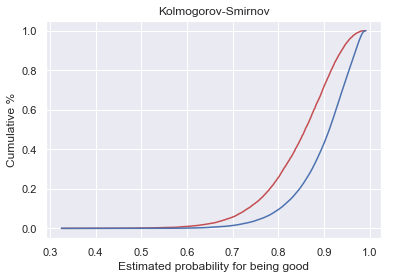

In [500]:
plt.plot(df_actual_predicted_prob["Predicted Probability"], df_actual_predicted_prob["Cumulative Perc Bad"],color ='r')
plt.plot(df_actual_predicted_prob["Predicted Probability"],df_actual_predicted_prob["Cumulative Perc Good"],color = "b")
plt.xlabel("Estimated probability for being good")
plt.ylabel("Cumulative %")
plt.title("Kolmogorov-Smirnov")

In [501]:
KS = max(df_actual_predicted_prob["Cumulative Perc Bad"]-df_actual_predicted_prob["Cumulative Perc Good"])
KS

0.28919365844094486

In [ ]:
#This value approaches 1 to have a great predictive power. Basically states how well the model can differentiate the 2 classes